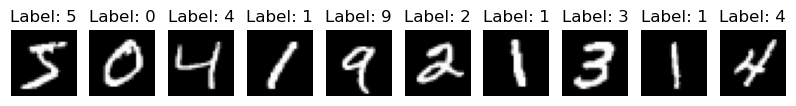

In [8]:
'''
PRIMEIRO VAMOS ENTENDER O QUE O CONJUNTO DE DADOS POSSUI
'''
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Carregar o conjunto de dados MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Escolher quantas imagens você deseja exibir
num_images_to_display = 10

# Exibir as imagens
plt.figure(figsize=(10, 5))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')  # Ocultar os eixos
plt.show()


In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Carregar o conjunto de dados MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
'''
mnist = keras.datasets.mnist: Ela define uma variável chamada mnist que armazena a referência 
ao conjunto de dados MNIST. MNIST é um conjunto de dados amplamente usado para treinar 
modelos de reconhecimento de dígitos escritos à mão (0 a 9).
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(): Esta linha carrega o conjunto de dados MNIST dividido em quatro variáveis:

train_images: Contém as imagens de treinamento, que são imagens de dígitos escritos à mão.
train_labels: Contém os rótulos de treinamento correspondentes às imagens de treinamento, 
indicando qual dígito cada imagem representa.
test_images: Contém as imagens de teste, que são usadas 
para avaliar o desempenho do modelo após o treinamento.
test_labels: Contém os rótulos de teste correspondentes às imagens de teste.

'''

# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0
'''
Essa linha de código realiza a normalização das imagens nos conjuntos de treinamento (`train_images`) 
e teste (`test_images`) do conjunto de dados MNIST. A normalização é uma etapa comum no 
pré-processamento de dados para redes neurais, especialmente quando se trata de imagens.
Nesta linha, cada pixel em todas as imagens é dividido por 255.0. 
O motivo para essa divisão é colocar os valores dos pixels no intervalo [0, 1]. 
No conjunto de dados MNIST, os valores originais dos pixels estão no intervalo de 0 a 255, 
onde 0 representa a ausência de cor (preto) e 255 representa a cor máxima (branco). 
Dividindo todos os valores por 255.0, você obtém valores normalizados no intervalo de 0 a 1.
A normalização ajuda a estabilizar o treinamento de redes neurais, 
facilitando o aprendizado, uma vez que os valores de entrada estão em uma faixa mais gerenciável.
Isso é especialmente importante quando se utilizam funções de ativação como a ReLU, 
que são sensíveis a valores muito grandes.
Portanto, essa linha de código é uma etapa comum de pré-processamento que torna os dados de entrada 
mais adequados para treinar uma rede neural no conjunto de dados MNIST.
'''

# Criar a RNA
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Camada de entrada: achatamento da imagem 28x28
    keras.layers.Dense(128, activation='relu'),  # Camada oculta com ativação ReLU
    keras.layers.Dropout(0.2),  # Dropout para evitar overfitting
    keras.layers.Dense(10, activation='softmax')  # Camada de saída com ativação softmax para classificação multiclasse
])
'''

DESCRIÇÃO DO QUE CADA CAMADA É E SUA FUNÇÃO

1. Camada de Entrada (Flatten):
   - keras.layers.Flatten(input_shape=(28, 28))
   - Esta é a camada de entrada da RNA. Ela achatará as imagens de entrada que têm dimensões de 28x28 pixels
     em um vetor unidimensional de 784 elementos. Isso permite que a RNA processe as imagens como uma 
     sequência de valores em vez de uma matriz bidimensional.

2. Camada Oculta (Dense):
   - keras.layers.Dense(128, activation='relu')
   - Esta é uma camada oculta com 128 neurônios.
   - A ativação ReLU (Rectified Linear Unit) é usada para introduzir não linearidades na camada. 
   Isso permite que a RNA aprenda relações complexas nos dados de entrada.

3. Camada de Dropout:
   - keras.layers.Dropout(0.2)
   - Esta camada aplica o dropout com uma taxa de 0,2, o que significa que durante o treinamento,
     20% dos neurônios na camada oculta serão temporariamente desligados aleatoriamente em cada 
     etapa de treinamento. O dropout é usado para combater o overfitting, ajudando a rede 
     a generalizar melhor para dados não vistos.

4. Camada de Saída (Dense):
   - keras.layers.Dense(10, activation='softmax')
   - Esta é a camada de saída da RNA.
   - Ela possui 10 neurônios, correspondendo às 10 classes possíveis nos dígitos de 0 a 9.
   - A ativação softmax é usada aqui, o que transforma as saídas da camada em uma distribuição 
   de probabilidade sobre as classes. Isso é adequado para problemas de classificação multiclasse, 
   onde a RNA precisa atribuir uma probabilidade a cada classe.

Portanto, a RNA tem uma camada de entrada que achatará as imagens MNIST, 
uma camada oculta com ReLU e dropout para aprendizado e regularização, 
e uma camada de saída com ativação softmax para classificação multiclasse. 

'''


# Compilar a RNA
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Função de perda para classificação multiclasse
              metrics=['accuracy'])
'''
Três aspectos importantes:

1. Otimizador (optimizer):
   - Neste caso, está sendo usado o otimizador 'adam'.
   - O otimizador é o algoritmo que ajusta os pesos da rede durante o treinamento para minimizar 
   a função de perda. O 'adam' é um otimizador popular que se adapta dinamicamente 
   à taxa de aprendizado à medida que o treinamento progride, 
   tornando-o eficiente para muitos tipos de problemas.

2. Função de Perda (loss):
   - A função de perda é usada para avaliar quão bem a RNA está realizando a tarefa durante o treinamento.
   - Neste caso, a função de perda é 'sparse_categorical_crossentropy', 
   que é uma função de perda comum para problemas de classificação multiclasse. 
   Ela mede a diferença entre as previsões da RNA e os rótulos reais e é usada 
   para orientar o processo de otimização.

3. Métricas (metrics):
   - Aqui, você especificou que deseja acompanhar a métrica de 'accuracy' (acurácia) durante o treinamento.
   - A acurácia é uma métrica comum para problemas de classificação que mede a 
   proporção de exemplos classificados corretamente pela RNA em relação ao total de exemplos.

Após a compilação, a RNA está pronta para ser treinada. Durante o treinamento, o otimizador 
ajustará os pesos da rede para minimizar a função de perda, e você poderá monitorar 
a acurácia e outras métricas para avaliar o desempenho da RNA 
à medida que ela aprende com os dados de treinamento.
'''


# Treinar a RNA
model.fit(train_images, train_labels, epochs=15)
'''
Treinamento da RNA com o conjunto de aprendizagem train_images e seus respectivos rótulos train_labels
por um período de 5 épocas
'''

# Avaliar a RNA no conjunto de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_acc * 100:.2f}%')

# Fazer previsões
predictions = model.predict(test_images)

# Visualizar uma imagem e sua previsão
index = 0  # Índice da imagem de teste que você deseja visualizar
plt.figure()
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.title(f"Label Real: {test_labels[index]}, Previsão: {tf.argmax(predictions[index])}")
plt.show()


TypeError: Cannot convert 0.1 to EagerTensor of dtype int64

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Carregar o conjunto de dados MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
#train_images, test_images = train_images / 255.0, test_images / 255.0 #teste

# Criar a RNA
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar a RNA
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar a RNA
model.fit(train_images, train_labels, epochs=50)

# Avaliar a RNA no conjunto de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_acc * 100:.2f}%')

# Salvar o modelo treinado em um arquivo HDF5
model.save('d:/temp/treino.keras')  # Salva em 'modelo_mnist.h5'


Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 2.6847 - accuracy: 0.7585
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6041 - accuracy: 0.8391
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5040 - accuracy: 0.8690
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4366 - accuracy: 0.8889
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3932 - accuracy: 0.8993
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3693 - accuracy: 0.9039
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3450 - accuracy: 0.9105
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3433 - accuracy: 0.9134
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3278 - accuracy: 0.9162
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.320

In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Carregar o conjunto de dados MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0 #teste

# Criar a RNA
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar a RNA
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar a RNA
model.fit(train_images, train_labels, epochs=20)

# Avaliar a RNA no conjunto de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_acc * 100:.2f}%')

# Salvar o modelo treinado em um arquivo HDF5
model.save('d:/temp/treino.keras')  # Salva em 'modelo_mnist.h5'


Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3971 - accuracy: 0.8813
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2275 - accuracy: 0.9327
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1870 - accuracy: 0.9443
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1656 - accuracy: 0.9494
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1527 - accuracy: 0.9534
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1426 - accuracy: 0.9565
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1341 - accuracy: 0.9581
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1271 - accuracy: 0.9604
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1216 - accuracy: 0.9629
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.117